In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_df=ak.stock_zh_a_spot()
new_df

,代码,名称,最新价,涨跌额,涨跌幅,买入,卖出,昨收,今开,最高,最低,成交量,成交额,时间戳
0,bj430017,XD星昊医,10.75,0.22,2.089,10.74,10.75,10.53,10.63,10.78,10.52,332411.0,3538836.0,15:30:02
1,bj430047,诺思兰德,13.94,0.31,2.274,13.92,13.94,13.63,13.64,14.09,13.44,654052.0,8968616.0,15:30:02
2,bj430090,同辉信息,2.77,0.04,1.465,2.76,2.77,2.73,2.74,2.77,2.66,3772125.0,10280656.0,15:30:02
3,bj430139,华岭股份,9.65,0.21,2.225,9.63,9.65,9.44,9.44,9.72,9.33,1201696.0,11479034.0,15:30:02
4,bj430198,微创光电,4.97,0.07,1.429,4.96,4.97,4.90,4.88,4.99,4.85,1519765.0,7492322.0,15:30:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,sz301587,中瑞股份,30.49,0.80,2.695,30.49,30.50,29.69,29.40,30.89,29.35,4514378.0,136649673.0,16:40:45
5361,sz301588,美新科技,23.54,0.66,2.885,23.54,23.56,22.88,22.62,23.64,22.46,1675188.0,38836609.0,16:41:00
5362,sz301589,诺瓦星云,193.60,2.40,1.255,193.60,193.69,191.20,189.72,195.65,189.17,511854.0,98891427.0,16:41:15
5363,sz301591,肯特股份,41.76,1.39,3.443,41.76,41.77,40.37,39.99,41.90,38.58,3207462.0,130376727.0,16:41:30


原数据均值： 2.767497297297297
原数据标准差: 2.924570482151671


<Axes: >

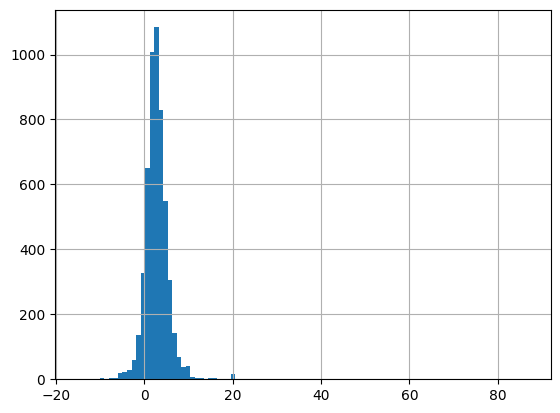

In [4]:
#对涨跌幅进行研究
cper=new_df['涨跌幅']
print('原数据均值：',cper.mean())
print('原数据标准差:',cper.std())
cper.hist(bins=100)

固定比例法处理后的均值： 2.7190663771854613
固定比例法处理后的标准差： 2.347321703441161


C:\Users\W10\AppData\Local\Temp\ipykernel_10672\3648744580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cper[cper>=cper.quantile(0.99)]=cper.quantile(0.99)
C:\Users\W10\AppData\Local\Temp\ipykernel_10672\3648744580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cper[cper<=cper.quantile(0.01)]=cper.quantile(0.01)


<Axes: >

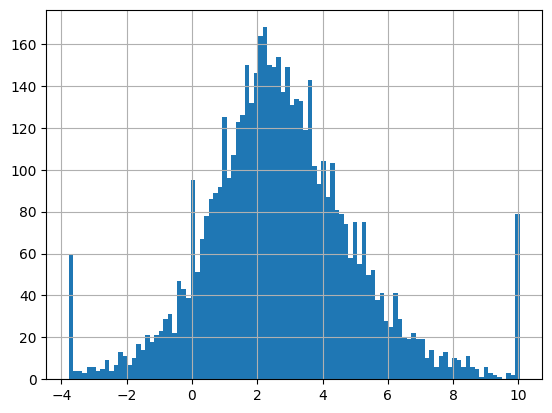

In [6]:
# 1.固定比例法
cper=new_df['涨跌幅']
cper[cper>=cper.quantile(0.99)]=cper.quantile(0.99)
cper[cper<=cper.quantile(0.01)]=cper.quantile(0.01)
print('固定比例法处理后的均值：',cper.mean())
print('固定比例法处理后的标准差：',cper.std())
cper.hist(bins=100)

C:\Users\W10\AppData\Local\Temp\ipykernel_10672\3639318508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cper[cper>=cper.mean()+3*cper.std()]=cper.mean()+3*cper.std()
C:\Users\W10\AppData\Local\Temp\ipykernel_10672\3639318508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cper[cper<=cper.mean()-3*cper.std()]=cper.mean()-3*cper.std()


均值标准差法处理后的均值为: 2.7150942550770223
均值标准差法处理后的标准差为： 2.3351406733432


<Axes: >

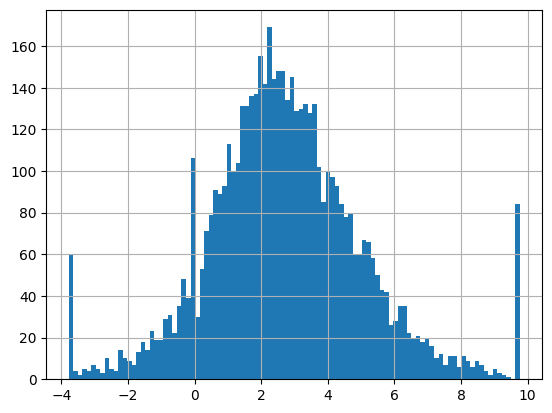

In [7]:
# 2.均值标准差法
cper=new_df['涨跌幅']
cper[cper>=cper.mean()+3*cper.std()]=cper.mean()+3*cper.std()
cper[cper<=cper.mean()-3*cper.std()]=cper.mean()-3*cper.std()
print('均值标准差法处理后的均值为:',cper.mean())
print('均值标准差法处理后的标准差为：',cper.std())
cper.hist(bins=100)

MAD法

将样本均值用样本中位数替代，样本标准差用样本绝对中位差MAD代替

MAD法处理异常值后均值为： 2.54635598036683
MAD法处理异常值后标准差为： 1.1783837081717101


<Axes: >

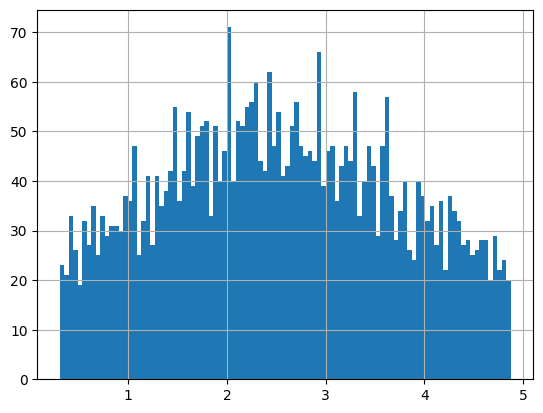

In [8]:
# MAD法
cper = new_df['涨跌幅']
cper = cper.dropna()
median = np.median(list(cper))
MAD = np.mean(abs(cper)-median)
cper = cper[abs(cper-median)/MAD <= 6]  # 剔除6倍以上的数据
print('MAD法处理异常值后均值为：', cper.mean())
print('MAD法处理异常值后标准差为：', cper.std())
cper.hist(bins=100)

Boxplot法处理异常值后均值: 2.734908997527607
Boxplot法处理异常值后标准差 2.2416532984880218


<Axes: >

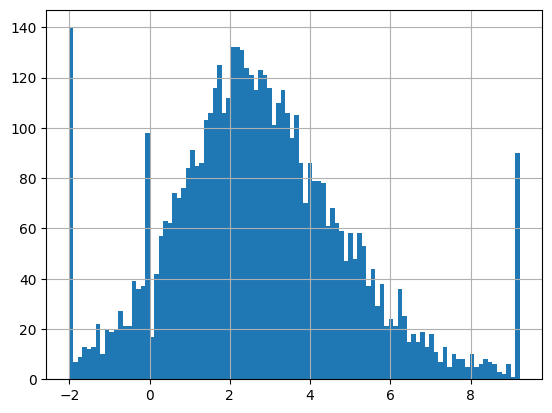

In [9]:
# 4. Boxplot法
from statsmodels.stats.stattools import medcouple
cper=new_df['涨跌幅']
cper=cper.dropna()
#定义函数,返回boxplot法所得数据
def boxplot(data):
    #计算出medcouple对斜线的稳健度量
    mc=medcouple(data)
    data.sort()
    #计算q1，q3
    q1=data[int(0.25*len(data))]
    q3=data[int(0.75*len(data))]
    iqr=q3-q1
    #稳健量>0时，boxplot法的上下限
    if mc>=0:
        l=q1-1.5*np.exp(-3.5*mc)*iqr
        u=q3+1.5*np.exp(4*mc)*iqr
    #稳健量<0时，boxplot的上下限
    else:
        l=q1-1.5*np.exp(-4*mc)*iqr
        u=q3+1.5*np.exp(3*mc)*iqr
        
    data=pd.Series(data)
    data[data<l]=l
    data[data>u]=u
    return data

print('Boxplot法处理异常值后均值:',boxplot(list(cper)).mean())
print('Boxplot法处理异常值后标准差',boxplot(list(cper)).std())
boxplot(list(cper)).hist(bins=100)


In [7]:
import tushare as ts
import pandas as pd
import numpy as np

data=[]
data=pd.concat(data,ts.get_today_all(),ignore_index=True)
data


[Getting data:]##

c:\Users\W10\AppData\Local\Programs\Python\Python312\Lib\site-packages\tushare\stock\trading.py:135: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.DataFrame(pd.read_json(js, dtype={'code':object}),
c:\Users\W10\AppData\Local\Programs\Python\Python312\Lib\site-packages\tushare\stock\trading.py:135: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.DataFrame(pd.read_json(js, dtype={'code':object}),


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
a1 = 'D'  # 在''中间填写你的 Q1 选项，实现效果如 a1 = 'A'
a2 = 'A'  # 在''中间填写你的Q2选项
a3 = 'C'  # 在''中间填写你的 Q3 选项